In [165]:
import numpy as np
import matplotlib.pyplot as plt

# Discount Cost problem

In [418]:
def g(y, x):
    '''as the name suggests it returns the single stage cost for coming on to the stage x from state y'''
    if(x == 100 and y!=100):
        return 1
    else:
        return 0

def single_stage_reward_expected(i, u, p):
    '''calculates E(g(x, u, w)) basically'''
    return p*(g(i, min(i+u, 100))) + (1-p)*(g(i, max(i-u, 0)))
    
def calc_prev_val_expected(i, u, curr_vals, p):
    '''calculates E(Jn-1(x, u, w)) '''
    return p*(curr_vals[min(i+u, 100)]) + (1-p)*(curr_vals[max(i-u, 0)])

def calc_next_val(i, current_vals, discount, p):
    maxreward = -1 
    bestaction = -1 # whats the best amount to invest among the amounts we caninvest
    # iterate over all actions and choose the one for which the average reward is maximized
    for u in range(0, min(i, 100-i)+1):
        reward = single_stage_reward_expected(i, u, p) + discount*(calc_prev_val_expected(i, u, current_vals, p))
        #round of reward because otherwise there are numerical precision errors
        reward = round(reward, 5)
#         print(reward)
        if(reward >= maxreward):
            maxreward = reward
            bestaction = u
#     print('state = {}, bestaction = {}'.format(i, u))
    
    return maxreward, bestaction

def next_val(current_vals, discount, p):
    '''calculate the next vals for all states in an array given the prev vals for all states in an array'''
    next_val = np.zeros((101))
    bestaction = np.zeros((101))
    for i in range(101):
        next_val[i], bestaction[i] = calc_next_val(i, current_vals, discount, p)
    
    return next_val, bestaction

def get_optimal_value(current_vals, discount, epsilon, miniter, p):
    converged = False
    bestaction = np.zeros((101))
    next_vals = np.zeros((101))
    t = 0
    while(converged == False or t<miniter):
        t+=1
        current_vals = np.copy(next_vals)
        next_vals, bestaction = next_val(next_vals, discount, p)
        #stopping condition - if the current value estimat - prev value estimate < epsilon for all the states
        if(np.all(np.absolute(next_vals - current_vals) < epsilon)):
            converged = True
#         print(next_vals)
    return next_vals, bestaction

## TODO: NO discounting (or we can say discount = 1), make graphs for p=0.4, 0.55, 0.25

### Discount = 1, p=0.4

In [419]:
current_values = np.zeros((101)) #We start all the values from 0 ie J(x) = 0 foar all states x, which is a bounded function
# next_values = np.zeros((101))
discount = 1
epsilon = 0.0001
p = 0.4
miniter = 200
optimal_reward1a, bestactions1a = get_optimal_value(current_values, discount, epsilon, miniter, p)

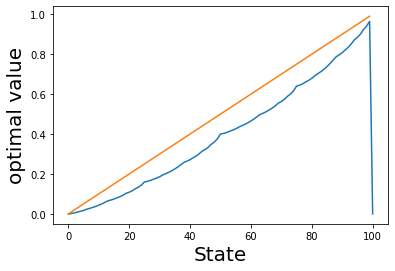

In [422]:
plt.plot(optimal_reward1a)
plt.plot([i/100 for i in range(100)])
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal value', fontsize = 20)
# plt.savefig('./plots/d1p.4iter200optivaluevsstate.jpeg', dpi = 300, bbox_inches = 'tight')

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  7. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 21. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 49. 48. 47.
 46. 45. 44. 43. 42. 41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29.
 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]


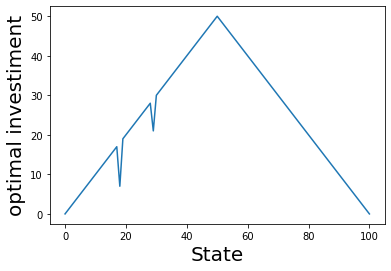

In [425]:
plt.plot(bestactions1a)
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal investiment', fontsize = 20)
print(bestactions1a)
# plt.savefig('./plots/d1p.4iter200optiinvestvsstate.jpeg', dpi = 300, bbox_inches = 'tight')

### Discount = 1, p=0.55

200 minimum iterations

In [427]:
current_values = np.zeros((101)) #We start all the values from 0 ie J(x) = 0 foar all states x, which is a bounded function
# next_values = np.zeros((101))
discount = 1
epsilon = 0.0001
p = 0.55
miniter = 200
optimal_reward1b, bestactions1b = get_optimal_value(current_values, discount, epsilon, miniter , p)

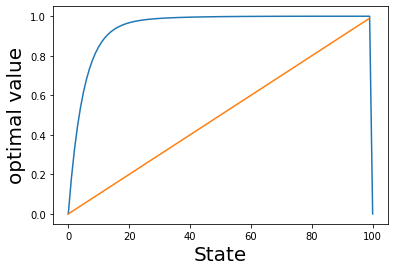

In [429]:
plt.plot(optimal_reward1b)
plt.plot([i/100 for i in range(100)])
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal value', fontsize = 20)
# plt.savefig('./plots/d1p.55iter200optivaluevsstate.jpeg', dpi = 300, bbox_inches = 'tight')

Text(0, 0.5, 'optimal investiment')

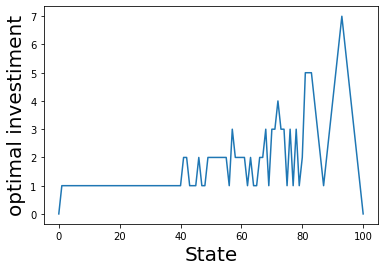

In [432]:
plt.plot(bestactions1b)
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal investiment', fontsize = 20)
# plt.savefig('./plots/d1p.55iter200optiinvestvsstate.jpeg', dpi = 300, bbox_inches = 'tight')

Increasing the number of iterations to 1000

In [433]:
current_values = np.zeros((101)) #We start all the values from 0 ie J(x) = 0 foar all states x, which is a bounded function
# next_values = np.zeros((101))
discount = 1
epsilon = 0.0001
p = 0.55
miniter = 1000
optimal_reward1b1, bestactions1b1 = get_optimal_value(current_values, discount, epsilon, miniter , p)

Text(0, 0.5, 'optimal value')

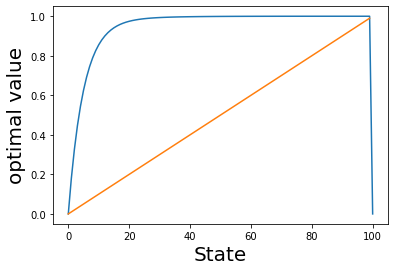

In [436]:
plt.plot(optimal_reward1b1)
plt.plot([i/100 for i in range(100)])
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal value', fontsize = 20)
# plt.savefig('./plots/d1p.55iter1000optivaluevsstate.jpeg', dpi = 300, bbox_inches = 'tight')

Text(0, 0.5, 'optimal investiment')

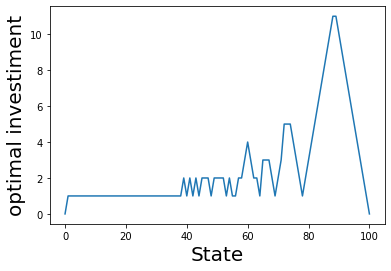

In [439]:
plt.plot(bestactions1b1)
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal investiment', fontsize = 20)
# plt.savefig('./plots/d1p.55iter1000optiinvestvsstate.jpeg', dpi = 300, bbox_inches = 'tight')

Increasing the number of iterations to 10000

In [388]:
current_values = np.zeros((101)) #We start all the values from 0 ie J(x) = 0 foar all states x, which is a bounded function
# next_values = np.zeros((101))
discount = 1
epsilon = 0.0001
p = 0.55
miniter = 10000
optimal_reward1b2, bestactions1b2 = get_optimal_value(current_values, discount, epsilon, miniter , p)

Text(0, 0.5, 'optimal value')

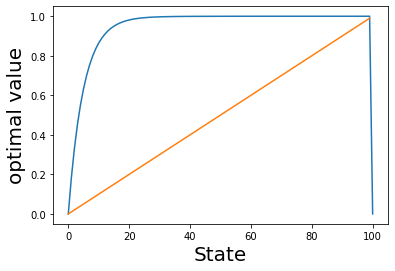

In [389]:
plt.plot(optimal_reward1b2)
plt.plot([i/100 for i in range(100)])
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal value', fontsize = 20)
# plt.savefig('./plots/d1p.55iter10000optivaluevsstate.jpeg', dpi = 300, bbox_inches = 'tight')

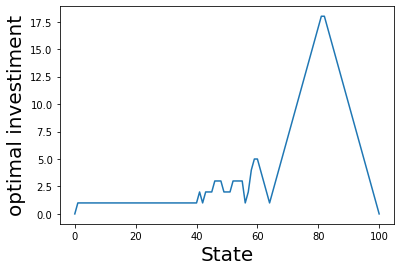

In [390]:
plt.plot(bestactions1b2)
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal investiment', fontsize = 20)
plt.savefig('./plots/d1p.55optivaluevsstate.jpeg', dpi = 300, bbox_inches = 'tight')
# plt.savefig('./plots/d1p.55iter10000optiinvestvsstate.jpeg', dpi = 300, bbox_inches = 'tight')

### Discount = 1, p=0.25

In [440]:
current_values = np.zeros((101)) #We start all the values from 0 ie J(x) = 0 foar all states x, which is a bounded function
# next_values = np.zeros((101))
discount = 1
epsilon = 0.0001
p = 0.25
miniter = 200
optimal_reward1c, bestactions1c = get_optimal_value(current_values, discount, epsilon, miniter , p)

Text(0, 0.5, 'optimal value')

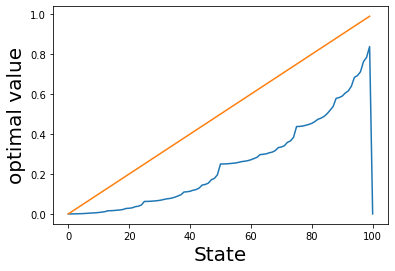

In [443]:
plt.plot(optimal_reward1c)
plt.plot([i/100 for i in range(100)])
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal value', fontsize = 20)
# plt.savefig('./plots/d1p.25iter200optivaluevsstate.jpeg', dpi = 300, bbox_inches = 'tight')

Text(0, 0.5, 'optimal investment')

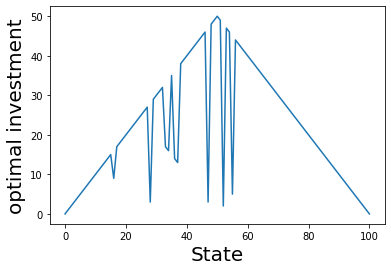

In [446]:
plt.plot(bestactions1c)
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal investment', fontsize = 20)
# plt.savefig('./plots/d1p.25iter200optiinvestvsstate.jpeg', dpi = 300, bbox_inches = 'tight')

### Discount = 0.9, p=0.4

In [447]:
current_values = np.zeros((101)) #We start all the values from 0 ie J(x) = 0 foar all states x, which is a bounded function
# next_values = np.zeros((101))
discount = 0.9
epsilon = 0.0001
p = 0.4
miniter = 400
optimal_reward, bestactions = get_optimal_value(current_values, discount, epsilon, miniter , p)

Text(0, 0.5, 'optimal value')

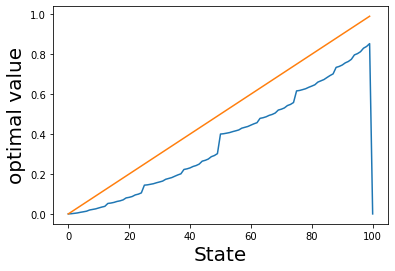

In [450]:
plt.plot(optimal_reward)
plt.plot([i/100 for i in range(100)])
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal value', fontsize = 20)
# plt.savefig('./plots/d0.9p.4iter200optivaluevsstate.jpeg', dpi = 300, bbox_inches = 'tight')

Text(0, 0.5, 'optimal investiment')

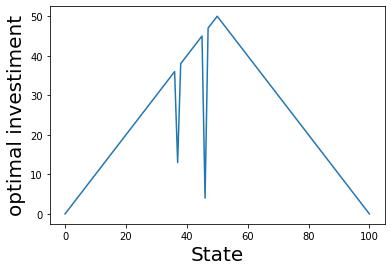

In [453]:
plt.plot(bestactions)
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal investiment', fontsize = 20)
# plt.savefig('./plots/d0.9p.4iter200optiinvestvsstate.jpeg', dpi = 300, bbox_inches = 'tight')

### Discount = 0.9, p=0.55

In [454]:
current_values = np.zeros((101)) #We start all the values from 0 ie J(x) = 0 foar all states x, which is a bounded function
# next_values = np.zeros((101))
discount = 0.9
epsilon = 0.0001
p = 0.55
miniter = 200
optimal_reward, bestactions = get_optimal_value(current_values, discount, epsilon, miniter , p)

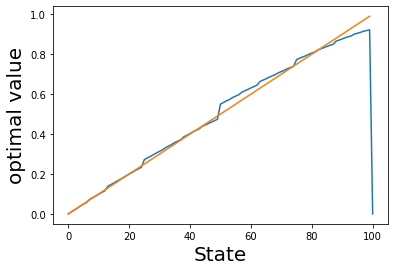

In [457]:
plt.plot(optimal_reward)
plt.plot([i/100 for i in range(100)])
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal value', fontsize = 20)
# plt.savefig('./plots/d0.9p.55iter200optivaluevsstate.jpeg', dpi = 300, bbox_inches = 'tight')

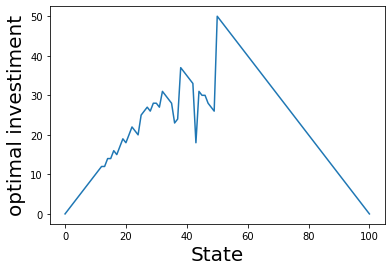

In [458]:
plt.plot(bestactions)
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal investiment', fontsize = 20)
# plt.savefig('./plots/d0.9p.55iter200optiinvestvsstate.jpeg', dpi = 300, bbox_inches = 'tight')

### Discount = 0.9, p=0.25

In [459]:
current_values = np.zeros((101)) #We start all the values from 0 ie J(x) = 0 foar all states x, which is a bounded function
# next_values = np.zeros((101))
discount = 0.9
epsilon = 0.0001
p = 0.25
miniter = 200
optimal_reward, bestactions = get_optimal_value(current_values, discount, epsilon, miniter , p)

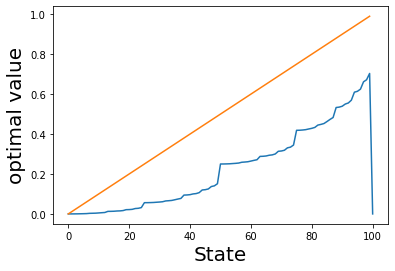

In [462]:
plt.plot(optimal_reward)
plt.plot([i/100 for i in range(100)])
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal value', fontsize = 20)
# plt.savefig('./plots/d0.9p.25iter200optivaluevsstate.jpeg', dpi = 300, bbox_inches = 'tight')

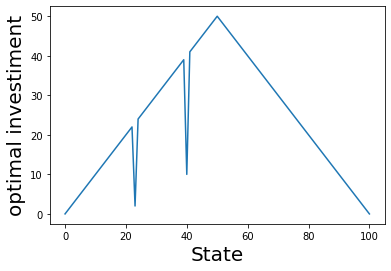

In [463]:
plt.plot(bestactions)
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal investiment', fontsize = 20)
# plt.savefig('./plots/d0.9p.25iter200optiinvestvsstate.jpeg', dpi = 300, bbox_inches = 'tight')